## part-1 implementaion

In [236]:
import numpy as np


input_size= 2
output_size=2
layer= [4,3]


def softmax(a):
    ep= np.exp(a)
    denom= np.sum(ep, axis=1, keepdims=True)
    if(np.prod(denom)==0):
        print("the output is coming out to be 0")
    ep= ep/denom
    return ep
    

In [237]:
class NeuralNetwork:
    
    def __init__(self , input_size, output_size, layer):
        np.random.seed(0)
        print("constructor is working")
        model= {}
        print(input_size, output_size, layer)
        model['w1']= np.random.randn(input_size,layer[0])
        model['b1']= np.zeros((1, layer[0]))
        print(model)
        model['w2']= np.random.randn(layer[0],layer[1])
        model['b2']=np.zeros((1, layer[1]))
            
        model['w3']= np.random.randn(layer[1],output_size)
        model['b3']= np.zeros((1, output_size))
            
        self.model= model
    def sample(self):
        return (self.model)
    def forward(self, x):
        w1,w2,w3= self.model['w1'],self.model['w2'], self.model['w3']
        b1, b2, b3= self.model['b1'], self.model['b2'], self.model['b3']
        
        z1= np.dot(x, w1) + b1;
        a1= np.tanh(z1);
        
        z2= np.dot(a1, w2)+ b2;
        a2= np.tanh(z2);
        
        z3= np.dot(a2, w3)+b3;
        y_= softmax(z3);
        
        self.activation_inputs= (a1, a2, y_)
        return y_
        
    def backward(self, x ,y , learning_rate= 0.001):
        w1, w2, w3= self.model['w1'], self.model['w2'], self.model['w3']
        b1, b2, b3= self.model['b1'], self.model['b2'], self.model['b3']
        m = x.shape[0]
        a1, a2, y_= self.activation_inputs
        
        
        delta3= y_- y
        dw3= np.dot(a2.T, delta3)
        db3= np.sum(delta3, axis= 0 )/float(m)
        
        delta2= (1-np.square(a2)) *np.dot(delta3 , w3.T)
        dw2= np.dot(a1.T, delta2)
        db2= np.sum(delta2, axis= 0 )/float(m)
        
        delta1 = (1-np.square(a1))* np.dot(delta2, w2.T)
        dw1= np.dot(x.T, delta1)
        db1= np.sum(delta1, axis=0)/float(m)
        
        self.model['w1'] -= learning_rate*dw1
        self.model['b1'] -= learning_rate*db1
        
        self.model['w2']-= learning_rate*dw2
        self.model['b2'] -= learning_rate*db2
        
        self.model['w3']-= learning_rate*dw3
        self.model['b3']-= learning_rate*db3
        
    def predict(self,x):
        y_out= self.forward(x)
        return np.argmax(y_out, axis = 1)
    def summary(self ):
        w1, w2, w3= self.model['w1'], self.model['w2'], self.model['w3']
        a1, a2, y_= self.activation_inputs
        
        print("w1", w1.shape)
        print("a1", a1.shape)
        
        print("w2", w2.shape)
        print("a2", a2.shape)
        
        print("w3", w3.shape)
        print("y_", y_.shape)
  


In [238]:
def loss(y_oht, p):
    l = -np.mean(y_oht*np.log(p))
    return l
def ohv(y, depth):
    m= y.shape[0]
    y_oht=  np.zeros((m, depth));
    y_oht[np.arange(m), y]= 1;
    return y_oht;

In [239]:
from sklearn.datasets import make_circles
import matplotlib.pyplot  as plt
X,Y= make_circles(n_samples=500,
    shuffle=True,
    noise=0.1,
    random_state=10,
    factor=0.8,)


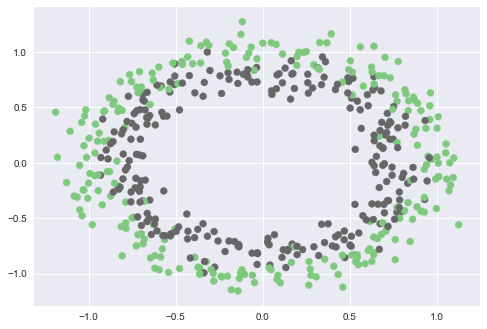

In [240]:
plt.style.use("seaborn")
plt.scatter(X[:,0], X[:,1], c=Y, cmap=plt.cm.Accent)
plt.show()

## Training your model

In [316]:
model= NeuralNetwork(input_size= 2, output_size=2 , layer= [10,5])

constructor is working
2 2 [10, 5]
{'w1': array([[ 1.76405235,  0.40015721,  0.97873798,  2.2408932 ,  1.86755799,
        -0.97727788,  0.95008842, -0.15135721, -0.10321885,  0.4105985 ],
       [ 0.14404357,  1.45427351,  0.76103773,  0.12167502,  0.44386323,
         0.33367433,  1.49407907, -0.20515826,  0.3130677 , -0.85409574]]), 'b1': array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])}


In [351]:
def train(X,Y, learning_rate, epoch, model, logs= True):
    training_loss=[]
    classes= 2
    y_hot=ohv(Y,classes)
    
    for ix in range(epoch):
        y_= model.forward(X)
        l=loss(y_hot, y_);
        model.backward(X,y_hot,learning_rate)
        training_loss.append(l)
        if(logs):
            print("for epoch %d loss is %0.4f"%(ix, l))
    return training_loss

training_loss=train(X,Y,0.00005,2000,model)
    

for epoch 0 loss is 0.1968
for epoch 1 loss is 0.1968
for epoch 2 loss is 0.1968
for epoch 3 loss is 0.1968
for epoch 4 loss is 0.1968
for epoch 5 loss is 0.1968
for epoch 6 loss is 0.1968
for epoch 7 loss is 0.1968
for epoch 8 loss is 0.1968
for epoch 9 loss is 0.1967
for epoch 10 loss is 0.1967
for epoch 11 loss is 0.1967
for epoch 12 loss is 0.1967
for epoch 13 loss is 0.1967
for epoch 14 loss is 0.1967
for epoch 15 loss is 0.1967
for epoch 16 loss is 0.1967
for epoch 17 loss is 0.1967
for epoch 18 loss is 0.1967
for epoch 19 loss is 0.1967
for epoch 20 loss is 0.1966
for epoch 21 loss is 0.1966
for epoch 22 loss is 0.1966
for epoch 23 loss is 0.1966
for epoch 24 loss is 0.1966
for epoch 25 loss is 0.1966
for epoch 26 loss is 0.1966
for epoch 27 loss is 0.1966
for epoch 28 loss is 0.1966
for epoch 29 loss is 0.1966
for epoch 30 loss is 0.1966
for epoch 31 loss is 0.1966
for epoch 32 loss is 0.1965
for epoch 33 loss is 0.1965
for epoch 34 loss is 0.1965
for epoch 35 loss is 0.1965
fo

for epoch 336 loss is 0.1939
for epoch 337 loss is 0.1939
for epoch 338 loss is 0.1939
for epoch 339 loss is 0.1939
for epoch 340 loss is 0.1939
for epoch 341 loss is 0.1939
for epoch 342 loss is 0.1939
for epoch 343 loss is 0.1938
for epoch 344 loss is 0.1938
for epoch 345 loss is 0.1938
for epoch 346 loss is 0.1938
for epoch 347 loss is 0.1938
for epoch 348 loss is 0.1938
for epoch 349 loss is 0.1938
for epoch 350 loss is 0.1938
for epoch 351 loss is 0.1938
for epoch 352 loss is 0.1938
for epoch 353 loss is 0.1938
for epoch 354 loss is 0.1938
for epoch 355 loss is 0.1937
for epoch 356 loss is 0.1937
for epoch 357 loss is 0.1937
for epoch 358 loss is 0.1937
for epoch 359 loss is 0.1937
for epoch 360 loss is 0.1937
for epoch 361 loss is 0.1937
for epoch 362 loss is 0.1937
for epoch 363 loss is 0.1937
for epoch 364 loss is 0.1937
for epoch 365 loss is 0.1937
for epoch 366 loss is 0.1937
for epoch 367 loss is 0.1936
for epoch 368 loss is 0.1936
for epoch 369 loss is 0.1936
for epoch 370 

for epoch 653 loss is 0.1914
for epoch 654 loss is 0.1914
for epoch 655 loss is 0.1913
for epoch 656 loss is 0.1913
for epoch 657 loss is 0.1913
for epoch 658 loss is 0.1913
for epoch 659 loss is 0.1913
for epoch 660 loss is 0.1913
for epoch 661 loss is 0.1913
for epoch 662 loss is 0.1913
for epoch 663 loss is 0.1913
for epoch 664 loss is 0.1913
for epoch 665 loss is 0.1913
for epoch 666 loss is 0.1913
for epoch 667 loss is 0.1913
for epoch 668 loss is 0.1912
for epoch 669 loss is 0.1912
for epoch 670 loss is 0.1912
for epoch 671 loss is 0.1912
for epoch 672 loss is 0.1912
for epoch 673 loss is 0.1912
for epoch 674 loss is 0.1912
for epoch 675 loss is 0.1912
for epoch 676 loss is 0.1912
for epoch 677 loss is 0.1912
for epoch 678 loss is 0.1912
for epoch 679 loss is 0.1912
for epoch 680 loss is 0.1912
for epoch 681 loss is 0.1911
for epoch 682 loss is 0.1911
for epoch 683 loss is 0.1911
for epoch 684 loss is 0.1911
for epoch 685 loss is 0.1911
for epoch 686 loss is 0.1911
for epoch 687 

for epoch 1034 loss is 0.1886
for epoch 1035 loss is 0.1886
for epoch 1036 loss is 0.1886
for epoch 1037 loss is 0.1886
for epoch 1038 loss is 0.1885
for epoch 1039 loss is 0.1885
for epoch 1040 loss is 0.1885
for epoch 1041 loss is 0.1885
for epoch 1042 loss is 0.1885
for epoch 1043 loss is 0.1885
for epoch 1044 loss is 0.1885
for epoch 1045 loss is 0.1885
for epoch 1046 loss is 0.1885
for epoch 1047 loss is 0.1885
for epoch 1048 loss is 0.1885
for epoch 1049 loss is 0.1885
for epoch 1050 loss is 0.1885
for epoch 1051 loss is 0.1885
for epoch 1052 loss is 0.1885
for epoch 1053 loss is 0.1884
for epoch 1054 loss is 0.1884
for epoch 1055 loss is 0.1884
for epoch 1056 loss is 0.1884
for epoch 1057 loss is 0.1884
for epoch 1058 loss is 0.1884
for epoch 1059 loss is 0.1884
for epoch 1060 loss is 0.1884
for epoch 1061 loss is 0.1884
for epoch 1062 loss is 0.1884
for epoch 1063 loss is 0.1884
for epoch 1064 loss is 0.1884
for epoch 1065 loss is 0.1884
for epoch 1066 loss is 0.1884
for epoch 

for epoch 1402 loss is 0.1861
for epoch 1403 loss is 0.1861
for epoch 1404 loss is 0.1861
for epoch 1405 loss is 0.1861
for epoch 1406 loss is 0.1861
for epoch 1407 loss is 0.1861
for epoch 1408 loss is 0.1861
for epoch 1409 loss is 0.1861
for epoch 1410 loss is 0.1861
for epoch 1411 loss is 0.1861
for epoch 1412 loss is 0.1861
for epoch 1413 loss is 0.1861
for epoch 1414 loss is 0.1861
for epoch 1415 loss is 0.1861
for epoch 1416 loss is 0.1861
for epoch 1417 loss is 0.1861
for epoch 1418 loss is 0.1860
for epoch 1419 loss is 0.1860
for epoch 1420 loss is 0.1860
for epoch 1421 loss is 0.1860
for epoch 1422 loss is 0.1860
for epoch 1423 loss is 0.1860
for epoch 1424 loss is 0.1860
for epoch 1425 loss is 0.1860
for epoch 1426 loss is 0.1860
for epoch 1427 loss is 0.1860
for epoch 1428 loss is 0.1860
for epoch 1429 loss is 0.1860
for epoch 1430 loss is 0.1860
for epoch 1431 loss is 0.1860
for epoch 1432 loss is 0.1860
for epoch 1433 loss is 0.1860
for epoch 1434 loss is 0.1859
for epoch 

for epoch 1760 loss is 0.1840
for epoch 1761 loss is 0.1840
for epoch 1762 loss is 0.1840
for epoch 1763 loss is 0.1840
for epoch 1764 loss is 0.1840
for epoch 1765 loss is 0.1840
for epoch 1766 loss is 0.1840
for epoch 1767 loss is 0.1840
for epoch 1768 loss is 0.1840
for epoch 1769 loss is 0.1840
for epoch 1770 loss is 0.1840
for epoch 1771 loss is 0.1839
for epoch 1772 loss is 0.1839
for epoch 1773 loss is 0.1839
for epoch 1774 loss is 0.1839
for epoch 1775 loss is 0.1839
for epoch 1776 loss is 0.1839
for epoch 1777 loss is 0.1839
for epoch 1778 loss is 0.1839
for epoch 1779 loss is 0.1839
for epoch 1780 loss is 0.1839
for epoch 1781 loss is 0.1839
for epoch 1782 loss is 0.1839
for epoch 1783 loss is 0.1839
for epoch 1784 loss is 0.1839
for epoch 1785 loss is 0.1839
for epoch 1786 loss is 0.1839
for epoch 1787 loss is 0.1839
for epoch 1788 loss is 0.1838
for epoch 1789 loss is 0.1838
for epoch 1790 loss is 0.1838
for epoch 1791 loss is 0.1838
for epoch 1792 loss is 0.1838
for epoch 

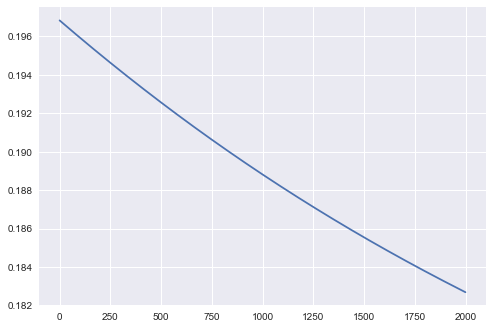

In [352]:
plt.plot(training_loss)





#### the next function can be included in visualize

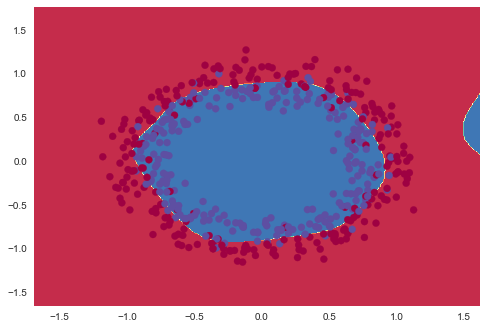

In [353]:
##function from net for visualization

def plot_decision_boundary(pred_func, X,Y):
    # Set min and max values and give it some padding
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    h = 0.01
    # Generate a grid of points with distance h between them
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    # Predict the function value for the whole gid
    Z = pred_func(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    # Plot the contour and training examples
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
    plt.scatter(X[:, 0], X[:, 1], c=Y, cmap=plt.cm.Spectral)

plot_decision_boundary (lambda x:model.predict(x),X ,Y)

In [355]:
result = model.predict(X)
accuracy_percentage=((np.sum(result ==Y))/Y.shape[0])*100
print(accuracy_percentage)

86.2
